In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.filters.rank import entropy 
from skimage.morphology import disk 
import glob 
import pickle 
from matplotlib import pyplot as plt
h=100
w=128 

In [2]:
def getred(img):
    ir=[]
    for i in range(h):
        for j in range(w):
            ir.append(img[i][j][0])
            #print(imgo[i][j],1)
    ir=np.array(ir)
    print(ir.shape)
    irr=np.reshape(ir,(h,w))
    irr.shape
    return irr
def getgreen(img):
  ig=[]
  for i in range(h):
      for j in range(w):
          ig.append(img[i][j][1])
          #print(imgo[i][j],2)
  ig=np.array(ig)
  print(ig.shape)
  igg=np.reshape(ig,(h,w))
  igg.shape
  return igg
def getblue(img):
  ib=[]
  for i in range(h):
      for j in range(w):
          ib.append(img[i][j][2])
          #print(imgo[i][j],3)
  ib=np.array(ib)
  print(ib.shape)
  ibb=np.reshape(ib,(h,w))
  ibb.shape  
  return ibb

In [3]:
import numpy as np
import cv2
import pandas as pd

def feature_extraction(img):
    df = pd.DataFrame()
    img2 = img.reshape(-1)
    df['Original Image'] = img2

    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
                
                    gabor_label = 'Gabor' + str(num)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  
                    num += 1
    edges = cv2.Canny(img, 100,200)   
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 

    from skimage.filters import roberts, sobel, scharr, prewitt


    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1


    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  

    return df

# Red

C:\Users\sudhakararao\Desktop\Project\colorseg\t1.jpg
C:\Users\sudhakararao\Desktop\Project\colorseg\t2.jpg
C:\Users\sudhakararao\Desktop\Project\colorseg\t3.jpg
C:\Users\sudhakararao\Desktop\Project\colorseg\t4.jpg
4
C:\Users\sudhakararao\Desktop\Project\colorseg1\t1outnew.png
C:\Users\sudhakararao\Desktop\Project\colorseg1\t2outnew.png
C:\Users\sudhakararao\Desktop\Project\colorseg1\t3outnew.png
C:\Users\sudhakararao\Desktop\Project\colorseg1\t4outnew.png
4


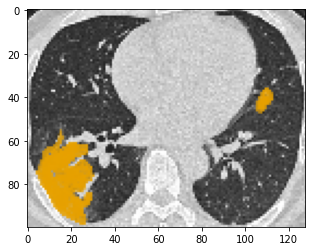

In [4]:
path=r'C:\Users\sudhakararao\Desktop\Project'
l=['colorseg','colorseg1']
all1=[]
for i in l:
    c=0
    dataset=os.path.join(path,i)
    for j in os.listdir(dataset):
        imagepath=os.path.join(dataset,j)
        print(imagepath)
        img=cv2.imread(imagepath)
        img=cv2.resize(img,(w,h))
        plt.imshow(img)
        all1.append(img)
        c+=1
    print(c)

(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/3349081705.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/3349081705.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/3349081705.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/3349081705.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


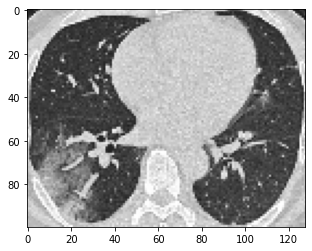

In [6]:
img_datared=pd.DataFrame()
for i in range(0,4):
    dfr=pd.DataFrame()
    dfr = feature_extraction(getred(all1[i]))
    img_datared=img_datared.append(dfr)
    plt.imshow(all1[i])

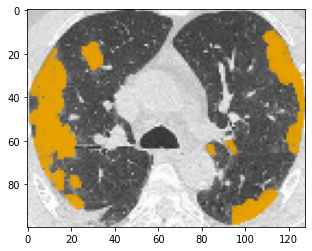

In [7]:
plt.imshow(all1[5])

4
(12800,)
5
(12800,)
6
(12800,)
7
(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/294674972.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/294674972.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/294674972.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/294674972.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)


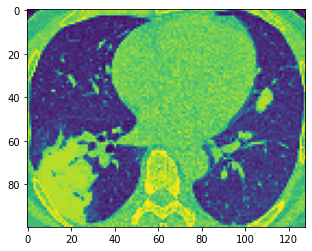

In [8]:
imgo_datared=pd.DataFrame()
for i in range(4,8): 
    print(i)
    dfro = getred(all1[i])
    plt.imshow(dfro)
    io=  dfro.reshape(-1)
    dfred=pd.DataFrame()
    dfred['label']=io 
    imgo_datared=imgo_datared.append(dfred)
datasetred=pd.concat([img_datared,imgo_datared], axis=1)

In [9]:
Y=datasetred['label'].values
X=datasetred.drop(labels = ['label'],axis=1)

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=20)

In [11]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [12]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Original Image    0.210325
Median s3         0.052470
Roberts           0.049829
Variance s3       0.048121
Scharr            0.047018
Sobel             0.046051
Prewitt           0.046029
Gaussian s7       0.044140
Gabor31           0.042868
Gaussian s3       0.042301
Gabor32           0.042128
Gabor24           0.041531
Gabor21           0.040070
Gabor29           0.039432
Gabor30           0.037274
Gabor6            0.036638
Gabor7            0.032624
Gabor8            0.026436
Gabor5            0.021112
Gabor23           0.018200
Gabor4            0.012650
Gabor12           0.006832
Gabor22           0.006667
Canny Edge        0.005161
Gabor11           0.004051
Gabor3            0.000043
Gabor14           0.000000
Gabor2            0.000000
Gabor9            0.000000
Gabor10           0.000000
Gabor13           0.000000
Gabor20           0.000000
Gabor1            0.000000
Gabor16           0.000000
Gabor17           0.000000
Gabor28           0.000000
Gabor27           0.000000
G

In [13]:
pre=model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pre))

0.360546875


In [14]:
pre_r=model.predict(X[0:w*h])
pre_r

array([ 34,  40,  55, ..., 201, 207, 200], dtype=uint8)

0.935390625


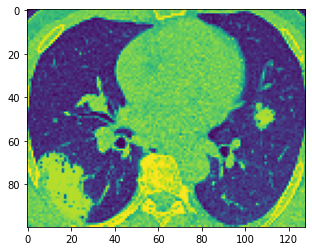

In [15]:
s=pre_r[0:w*h].reshape((h,w))
plt.imshow(s) 
from sklearn import metrics
print(metrics.accuracy_score(Y[0:w*h],pre_r))

In [16]:
import pickle
filename = "rrcol_model"
pickle.dump(model, open(filename, 'wb'))

# Green

(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/751612726.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/751612726.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/751612726.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/751612726.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


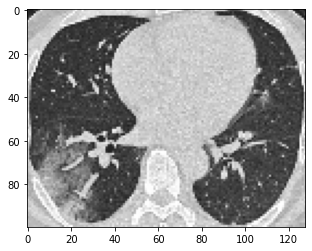

In [17]:
img_datared=pd.DataFrame()
for i in range(4):
    dfr=pd.DataFrame()
    dfr = feature_extraction(getgreen(all1[i]))
    img_datared=img_datared.append(dfr)
    plt.imshow(all1[i]) 

(12800,)
(12800,)
(12800,)
(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/4252565485.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/4252565485.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/4252565485.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/4252565485.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)


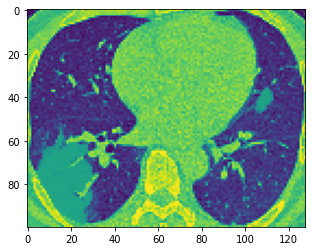

In [18]:
imgo_datared=pd.DataFrame()
for i in range(4,8): 
    dfro = getgreen(all1[i])
    plt.imshow(dfro)
    io=  dfro.reshape(-1)
    dfred=pd.DataFrame()
    dfred['label']=io 
    imgo_datared=imgo_datared.append(dfred)
datasetred=pd.concat([img_datared,imgo_datared], axis=1)

In [19]:
Y=datasetred['label'].values
X=datasetred.drop(labels = ['label'],axis=1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=20)

In [21]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [22]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Original Image    0.216075
Median s3         0.052486
Roberts           0.048980
Variance s3       0.047418
Prewitt           0.047178
Scharr            0.045701
Sobel             0.045236
Gaussian s7       0.043413
Gaussian s3       0.042855
Gabor32           0.042186
Gabor31           0.041895
Gabor24           0.041601
Gabor21           0.040200
Gabor29           0.039118
Gabor30           0.037244
Gabor6            0.036142
Gabor7            0.031927
Gabor8            0.026633
Gabor5            0.020538
Gabor23           0.018040
Gabor4            0.012651
Gabor22           0.006708
Gabor12           0.006690
Canny Edge        0.005132
Gabor11           0.003911
Gabor3            0.000041
Gabor14           0.000000
Gabor2            0.000000
Gabor9            0.000000
Gabor10           0.000000
Gabor13           0.000000
Gabor20           0.000000
Gabor1            0.000000
Gabor16           0.000000
Gabor17           0.000000
Gabor28           0.000000
Gabor27           0.000000
G

In [23]:
pre=model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pre))

0.363671875


0.93125


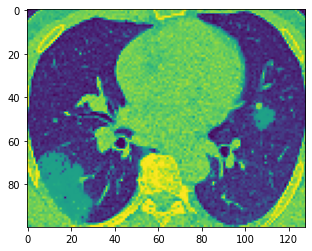

In [24]:
pre_r=model.predict(X[0:w*h])
s=pre_r[0:w*h].reshape((h,w))
plt.imshow(s) 
from sklearn import metrics
print(metrics.accuracy_score(Y[0:w*h],pre_r))

In [25]:
import pickle
filename = "gg_model"
pickle.dump(model, open(filename, 'wb'))

# Blue


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/655722752.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/655722752.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/655722752.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/655722752.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  img_datared=img_datared.append(dfr)


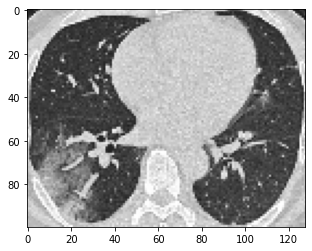

In [26]:
img_datared=pd.DataFrame()
for i in range(4):
    dfr=pd.DataFrame()
    dfr = feature_extraction(getblue(all1[i]))
    img_datared=img_datared.append(dfr)
    plt.imshow(all1[i])

(12800,)
(12800,)
(12800,)
(12800,)


C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/3740244872.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/3740244872.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/3740244872.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)
C:\Users\SUDHAK~1\AppData\Local\Temp/ipykernel_23556/3740244872.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  imgo_datared=imgo_datared.append(dfred)


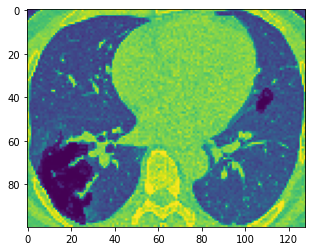

In [27]:
imgo_datared=pd.DataFrame()
for i in range(4,8): 
    dfro = getblue(all1[i])
    plt.imshow(dfro)
    io=  dfro.reshape(-1)
    dfred=pd.DataFrame()
    dfred['label']=io 
    imgo_datared=imgo_datared.append(dfred)
datasetred=pd.concat([img_datared,imgo_datared], axis=1)

In [28]:
Y=datasetred['label'].values
X=datasetred.drop(labels = ['label'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=20)

In [30]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [31]:
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Original Image    0.216108
Median s3         0.050552
Roberts           0.048742
Prewitt           0.046916
Variance s3       0.046802
Scharr            0.045915
Sobel             0.044404
Gaussian s7       0.043698
Gabor24           0.042796
Gabor31           0.042720
Gabor32           0.042498
Gaussian s3       0.041842
Gabor21           0.040785
Gabor29           0.039821
Gabor30           0.037137
Gabor6            0.035594
Gabor7            0.031712
Gabor8            0.027024
Gabor5            0.020280
Gabor23           0.019180
Gabor4            0.012906
Gabor12           0.007036
Gabor22           0.006584
Canny Edge        0.004951
Gabor11           0.003953
Gabor3            0.000043
Gabor14           0.000000
Gabor2            0.000000
Gabor9            0.000000
Gabor10           0.000000
Gabor13           0.000000
Gabor19           0.000000
Gabor20           0.000000
Gabor16           0.000000
Gabor28           0.000000
Gabor27           0.000000
Gabor26           0.000000
G

In [32]:
pre=model.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_test,pre))

0.372265625


0.934140625


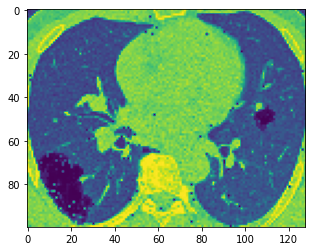

In [33]:
pre_r=model.predict(X[0:w*h])
s=pre_r[0:w*h].reshape((h,w))
plt.imshow(s) 
from sklearn import metrics
print(metrics.accuracy_score(Y[0:w*h],pre_r))

In [34]:
import pickle
filename = "bb_model"
pickle.dump(model, open(filename, 'wb'))

# Validation

In [35]:
import pickle
model_r=pickle.load(open('rrcol_model','rb'))  

In [36]:
import pickle
model_g=pickle.load(open('gg_model','rb')) 

In [37]:
import pickle
model_b=pickle.load(open('bb_model','rb')) 

C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\111.png
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_93.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_hosp34.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu45.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu46.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu47.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu48.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\covid_icu49.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\non_covid_10.jpg
C:\Users\sudhakararao\Desktop\Project\divideddataset\damaged\non_covid_100.jpg


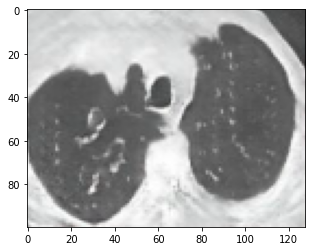

In [89]:
path=r'C:\Users\sudhakararao\Desktop\Project\divideddataset'
#l=['positive-hometratment','positive-hospitalize','positive-icu']
l1=['damaged']
all2=[]
for i in l1:
    c=0
    dataset=os.path.join(path,i)
    for j in os.listdir(dataset): 
        imagepath=os.path.join(dataset,j)
        img=cv2.imread(imagepath)
        img=cv2.resize(img,(w,h))
        plt.imshow(img)
        all2.append(img)
        #print(c,end=" ")
        print(imagepath)
        c+=1
        if(c==10):
            break

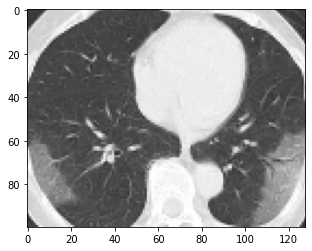

In [105]:
ck=1
plt.imshow(all2[ck])

(12800,)
12800


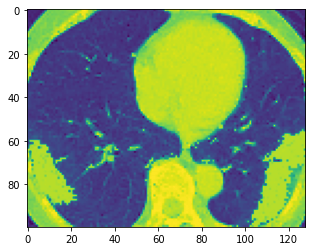

In [106]:
imgr=getred(all2[ck])
dfr = feature_extraction(imgr)
pre_r=model_r.predict(dfr)   
s_r=pre_r.reshape((h,w))
print(len(pre_r))
plt.imshow(s_r)

(12800,)
12800


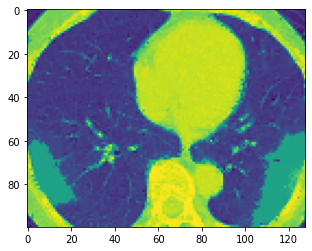

In [107]:
imgr=getgreen(all2[ck])
dfr = feature_extraction(imgr)
pre_g=model_g.predict(dfr)   
s_g=pre_g.reshape((h,w))
print(len(pre_g))
plt.imshow(s_g)

(12800,)
12800


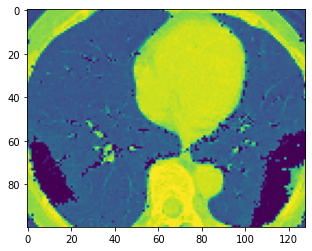

In [108]:
imgr=getblue(all2[ck])
dfr = feature_extraction(imgr)
pre_b=model_b.predict(dfr)   
s_b=pre_b.reshape((h,w))
print(len(pre_b))
plt.imshow(s_b)

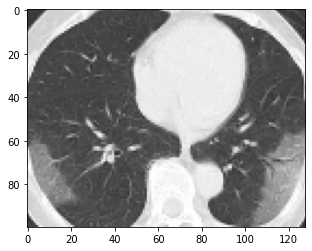

In [109]:
plt.imshow(all2[ck])

38400


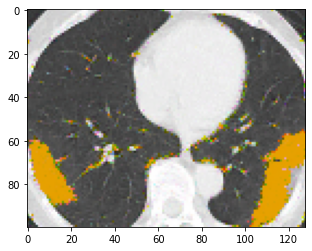

In [110]:
q=[]
for i in range(len(pre_b)):
  q.append(pre_r[i])
  q.append(pre_g[i])
  q.append(pre_b[i])
q=np.array(q)
print(len(q))
qq=np.reshape(q,(h,w,3))
plt.imshow(qq)

In [98]:
img = cv2.cvtColor(qq, cv2.COLOR_BGR2GRAY)

In [86]:
summ=0
for i in range(h):
    count=0
    for j in range(w):
        #print(s_r[i][j],end=" ")
        if(img[i][j]>=120 and img[i][j]<=145):
            count=count+1
    summ+=count
    #print(count)
    #print(len(s_r[i]),end=" ")
print(summ,end=" ")

2604 

In [87]:
import pickle
total_pixels=pickle.load(open('sum_pix.pkl','rb')) 

In [88]:
result=(summ/total_pixels)*100
result

47.41442097596504